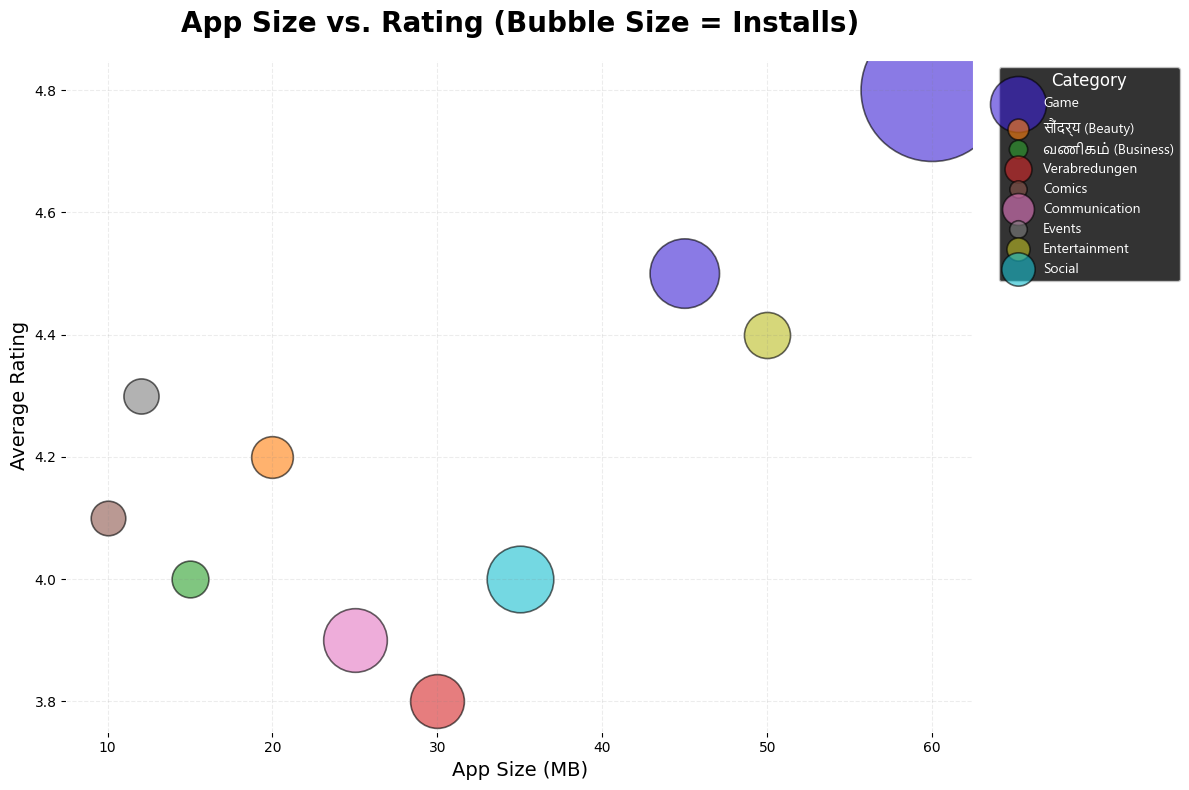

In [1]:
#5th task
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from datetime import datetime, time
import pytz
import platform


def check_time_constraint():
    ist = pytz.timezone('Asia/Kolkata')
    now_ist = datetime.now(ist)
    
    # FIX: Hour must be 23, not 24
    start_time = time(1, 0, 0) # 5 PM
    end_time = time(22, 00, 00) # 11:59 PM
    
    if start_time <= now_ist.time() <= end_time:
        return True
    else:
        print(f"⚠️ DASHBOARD LOCKED. Current time (IST): {now_ist.strftime('%H:%M')}")
        print("This graph is only visible between 1:00 PM and 11:59 PM IST.")
        return False


def get_indic_font():
    candidates = ['Nirmala UI', 'Arial Unicode MS', 'Mangal', 'Noto Sans', 'Latha']
    system_fonts = fm.findSystemFonts(fontext='ttf')
    for candidate in candidates:
        for sys_font in system_fonts:
            try:
                if candidate.lower() in fm.FontProperties(fname=sys_font).get_name().lower():
                    return fm.FontProperties(fname=sys_font)
            except:
                continue
    return fm.FontProperties(family='sans-serif')

# ==========================================
# 3. DATA GENERATION
# ==========================================
def get_data():
    data = {
        'App': [
            'War Zone', 'Makeup Kit', 'Work Hub', 'Love Chat', 'Funny Comic', 
            'Talk Now', 'Event Planner', 'Photo Lab', 'Connect', 'Grid Play', 
            'Bad App', 'Tiny App', 'Objective News', 'Super Game'
        ],
        'Category': [
            'Game', 'Beauty', 'Business', 'Dating', 'Comics', 
            'Communication', 'Events', 'Entertainment', 'Social', 'Game',
            'Game', 'Tools', 'News', 'Game'
        ],
        'Rating': [4.5, 4.2, 4.0, 3.8, 4.1, 3.9, 4.3, 4.4, 4.0, 4.8, 2.0, 4.0, 4.5, 4.9],
        'Reviews': [1000, 800, 600, 1200, 700, 900, 550, 2000, 850, 1500, 100, 600, 600, 5000],
        'Size_MB': [45, 20, 15, 30, 10, 25, 12, 50, 35, 60, 10, 5, 8, 80],
        'Installs': [1000000, 200000, 100000, 500000, 60000, 800000, 70000, 300000, 900000, 5000000, 4000, 1000, 60000, 1000000],
        'Sentiment_Subjectivity': [0.6, 0.8, 0.7, 0.9, 0.6, 0.55, 0.75, 0.65, 0.6, 0.8, 0.2, 0.9, 0.1, 0.7]
    }
    return pd.DataFrame(data)

# ==========================================
# 4. PLOTTING LOGIC
# ==========================================
def plot_dashboard():
    df = get_data()
    
    # Filters
    df = df[df['Rating'] > 3.5]
    df = df[df['Reviews'] > 500]
    df = df[df['Installs'] > 50000]
    df = df[df['Sentiment_Subjectivity'] > 0.5]
    df = df[~df['App'].str.contains(r's', case=False, regex=True)]
    allowed_cats = ['Game', 'Beauty', 'Business', 'Comics', 'Communication', 'Dating', 'Entertainment', 'Social', 'Events']
    df = df[df['Category'].isin(allowed_cats)]
    
    if df.empty:
        print("No data available after strict filtering.")
        return None

    # Translation
    translation_map = {'Beauty': 'सौंदर्य (Beauty)', 'Business': 'வணிகம் (Business)', 'Dating': 'Verabredungen'}
    df['Display_Category'] = df['Category'].map(lambda x: translation_map.get(x, x))

    # Styling
    plt.style.use('dark_background')
    plt.rcParams['font.family'] = 'sans-serif' # Changed to sans-serif for compatibility
    indic_font = get_indic_font()
    
    fig, ax = plt.subplots(figsize=(12, 8)) 
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    unique_cats = df['Display_Category'].unique()
    base_colors = plt.cm.tab10(np.linspace(0, 1, len(unique_cats))) 
    
    for i, cat_label in enumerate(unique_cats):
        subset = df[df['Display_Category'] == cat_label]
        original_cat = subset['Category'].iloc[0]
        
        color = "#3D22D4" if original_cat == 'Game' else base_colors[i]
        bubble_sizes = (subset['Installs'] / 500) + 500
        
        ax.scatter(
            subset['Size_MB'], 
            subset['Rating'], 
            s=bubble_sizes, 
            color=color, 
            alpha=0.6, 
            edgecolors='black', 
            linewidth=1.2,
            label=cat_label
        )

    ax.set_title('App Size vs. Rating (Bubble Size = Installs)', fontsize=20, color='black', fontweight='bold', pad=20)
    ax.set_xlabel('App Size (MB)', fontsize=14, color='black')
    ax.set_ylabel('Average Rating', fontsize=14, color='black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.grid(True, linestyle='--', alpha=0.15, color='gray')
    
    leg = ax.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left', prop=indic_font, markerscale=0.5)
    plt.setp(leg.get_title(), color='white', fontsize=12)
    for text in leg.get_texts():
        text.set_color("white")
        
    plt.tight_layout()
    return fig

if __name__ == "__main__":
    if check_time_constraint():
        fig = plot_dashboard()
        if fig:
            plt.show()